In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 

In [21]:
img = cv2.imread("./img/light-left.jpg")

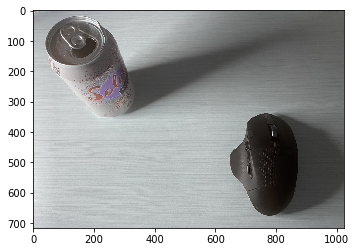

In [22]:
plt.imshow(img, cmap='gray')

In [23]:
def shadow_remove(img):
    rgb_planes = cv2.split(img)
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_norm_planes.append(norm_img)
    shadowremov = cv2.merge(result_norm_planes)
    return shadowremov


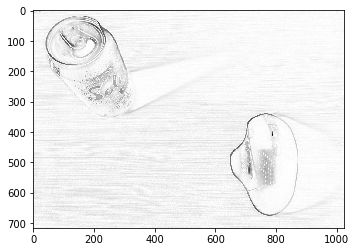

In [24]:
removed = shadow_remove(img)
removed = cv2.cvtColor(removed, cv2.COLOR_BGR2GRAY)
plt.imshow(removed, cmap='gray')

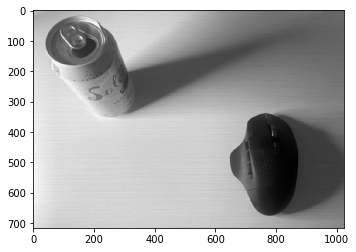

In [29]:
img = cv2.imread("./img/light-left.jpg",0)
blurred = cv2.GaussianBlur(img, (7, 7), 0)
plt.imshow(blurred, cmap='gray')

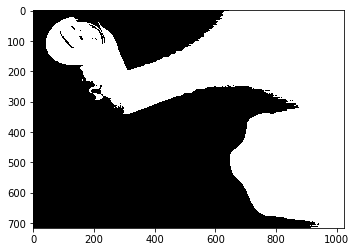

In [30]:
T, threshInv = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(threshInv, cmap='gray')


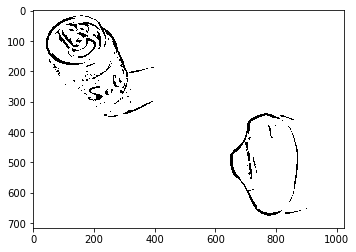

In [32]:
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
plt.imshow(thresh, cmap='gray')

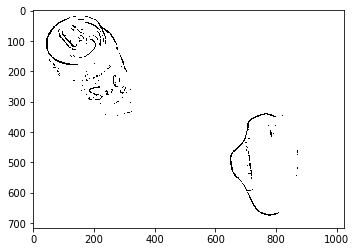

In [33]:
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 10)
plt.imshow(thresh, cmap='gray')